In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scienceplots

#matplotlib.rcParams['font.family'] = r'C://Users//sevke//Desktop//Dev//fonts//fira_sans//FiraSans-Regular.ttf'
prop = fm.FontProperties(fname=r'C://Users//sevke//Desktop//Dev//fonts//fira_sans//FiraSans-Regular.ttf', size=14)
plt.style.use(['science', 'notebook', 'no-latex'])

#datapath = r"C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\2y_2y2x_2y\trans_prob_matrices\2y_2y2x_2y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=0_trans_prob_matrix.npz"
datapath = r"C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\2y_2y2x_2y\trans_prob_matrices\2y_2y2x_2y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=1350_trans_prob_matrix.npz"
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\3y_3y2x_3y\trans_prob_matrices\3_3y2x_3___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=1890_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\3y_3y2x_3y\trans_prob_matrices\3_3y2x_3___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=1350_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\3y_3y2x_3y\trans_prob_matrices\3_3y2x_3___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=0_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\tests\trans_prob_matrices\MEETING_TEST___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=0_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\tests\trans_prob_matrices\MEETING_TEST_xy___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=450_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\6y_2y2x_2y\trans_prob_matrices\6y_2y2x_2y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=450_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\3y_1y2x_3y\trans_prob_matrices\3y_1y2x_3y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=0_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\3y_1y2x_1y\trans_prob_matrices\3y_1y2x_1y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=90_trans_prob_matrix.npz'
#datapath = r'C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\4y_2y2x_4y\trans_prob_matrices\4y_2y2x_4y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=0_trans_prob_matrix.npz'
loaded_data = np.load(datapath)

w = loaded_data['w']
trans_prob = loaded_data['trans_prob_matrix']
trans_prob.shape

(20000, 8, 8)

'cm'

In [3]:
# Extract eigenvalues and eigenvectors for all 10000 matrices
print(f"Shape of trans_prob matrix: {trans_prob.shape}")
print(f"Number of frequencies: {len(w)}")

# Arrays for all eigenvalues and eigenvectors
all_eigenvals = np.zeros((trans_prob.shape[0], trans_prob.shape[1]), dtype=complex)
all_eigenvecs = np.zeros((trans_prob.shape[0], trans_prob.shape[1], trans_prob.shape[2]), dtype=complex)

# Calculate eigenvalues and eigenvectors for each matrix
print("Calculating eigenvalues and eigenvectors...")
for i in range(trans_prob.shape[0]):
    '''if i % 1000 == 0:
        print(f"Progress: {i}/{trans_prob.shape[0]} ({100*i/trans_prob.shape[0]:.1f}%)")
    '''
    # Calculate eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(trans_prob[i])
    
    # Sort in descending order by magnitude of eigenvalues
    sort_indices = np.argsort(np.abs(eigvals))[::-1]
    
    # Store sorted values
    all_eigenvals[i] = eigvals[sort_indices]
    all_eigenvecs[i] = eigvecs[:, sort_indices]

print("Finished!")

Shape of trans_prob matrix: (20000, 8, 8)
Number of frequencies: 20000
Calculating eigenvalues and eigenvectors...
Finished!
Finished!


Maximum imaginary part of eigenvalues: 5.33e-15
Eigenvalues are practically real - converting to real


Maximum imaginary part of eigenvalues: 5.33e-15
Eigenvalues are practically real - converting to real


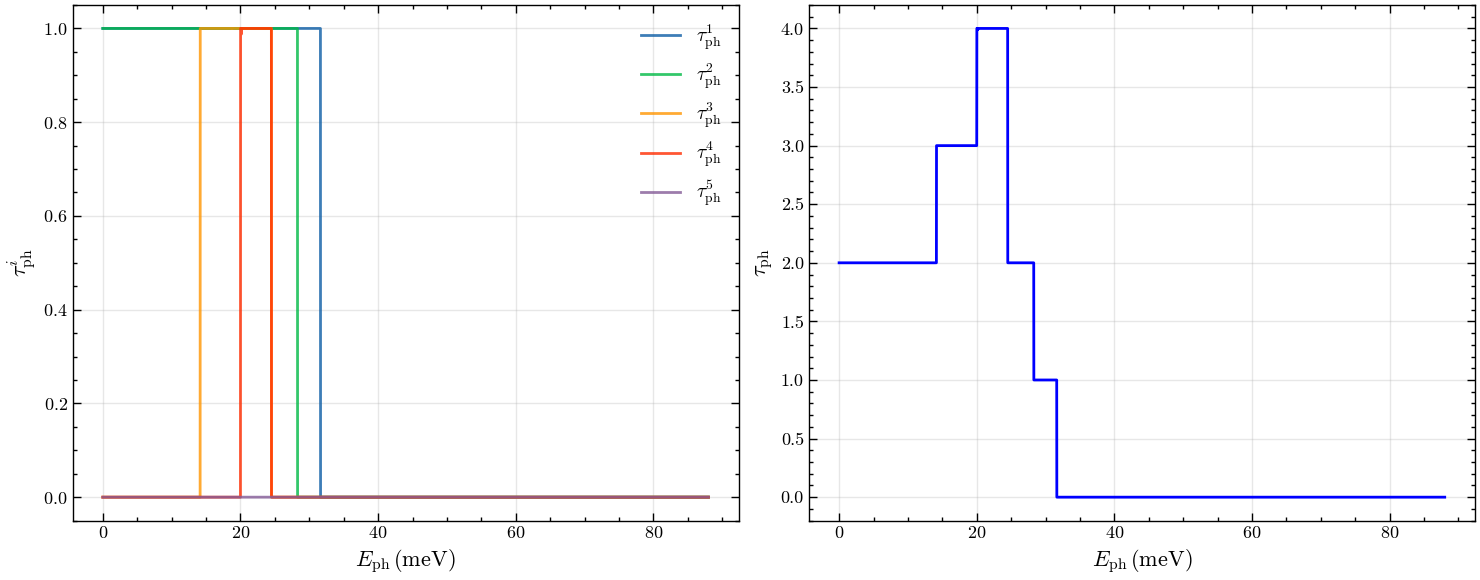

'print(f"Minimum eigenvalue: {np.min(all_eigenvals_real):.6f}")\nprint(f"Maximum eigenvalue: {np.max(all_eigenvals_real):.6f}")\nprint(f"Average largest eigenvalue: {np.mean(all_eigenvals_real[:, 0]):.6f}")\nprint(f"Average smallest eigenvalue: {np.mean(all_eigenvals_real[:, -1]):.6f}")\nprint(f"Maximum total transmission: {np.max(total_transmission):.6f}")\nprint(f"Average total transmission: {np.mean(total_transmission):.6f}")'

In [12]:
# Plot of the first few eigenvalues over all frequencies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Check if eigenvalues are real (they should be for transmission matrices)
max_imag_part = np.max(np.abs(np.imag(all_eigenvals)))
print(f"Maximum imaginary part of eigenvalues: {max_imag_part:.2e}")

if max_imag_part < 1e-10:
    print("Eigenvalues are practically real - converting to real")
    all_eigenvals_real = np.real(all_eigenvals)
else:
    print("Eigenvalues have significant imaginary parts")
    all_eigenvals_real = all_eigenvals

# Plot 1: The first 5 eigenvalues over all frequencies
for i in range(min(5, all_eigenvals_real.shape[1])):
    ax1.plot(w, all_eigenvals_real[:, i], label=rf'$\tau^{{{i+1}}}_{{\mathrm{{ph}}}}$', alpha=0.8)

ax1.set_xlabel(r'$E_{\text{ph}}\,\text{(meV)}$', fontsize=16, fontproperties=prop)
ax1.set_ylabel(r'$\tau_{\text{ph}}^i$', fontsize=16, fontproperties=prop)
#ax1.set_title(r'Largest eigenvalues over all frequencies', fontsize=16)
ax1.legend(prop=prop)
ax1.grid(True, alpha=0.3)
ax1.tick_params(labelsize=13)

# Plot 2: Total transmission as sum of all eigenvalues (eigenchannels)
total_transmission = np.sum(all_eigenvals_real, axis=1)
ax2.plot(w, total_transmission, 'b-', linewidth=2)

ax2.set_xlabel(r'$E_{\text{ph}}\,\text{(meV)}$', fontsize=16, fontproperties=prop)
ax2.set_ylabel(r'$\tau_{\text{ph}}$', fontsize=16, fontproperties=prop)
#ax2.legend(prop=prop)
ax2.grid(True, alpha=0.3)
ax2.tick_params(labelsize=13)

# Format y-axis ticks to show only 1 decimal place on ax2
from matplotlib.ticker import FormatStrFormatter
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()

# Show statistics about eigenvalue distribution and total transmission
'''print(f"Minimum eigenvalue: {np.min(all_eigenvals_real):.6f}")
print(f"Maximum eigenvalue: {np.max(all_eigenvals_real):.6f}")
print(f"Average largest eigenvalue: {np.mean(all_eigenvals_real[:, 0]):.6f}")
print(f"Average smallest eigenvalue: {np.mean(all_eigenvals_real[:, -1]):.6f}")
print(f"Maximum total transmission: {np.max(total_transmission):.6f}")
print(f"Average total transmission: {np.mean(total_transmission):.6f}")'''

[0 1]


[0 1]


c:\Users\sevke\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sevke\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


[0 1]


c:\Users\sevke\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sevke\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


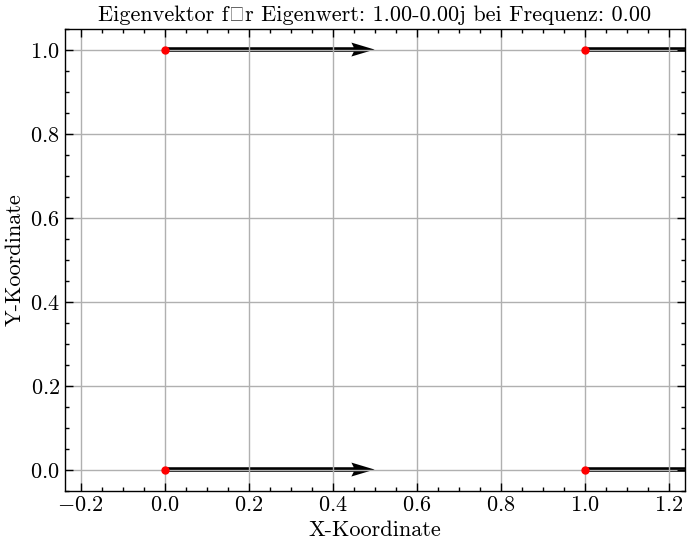

[0 1]


c:\Users\sevke\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sevke\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


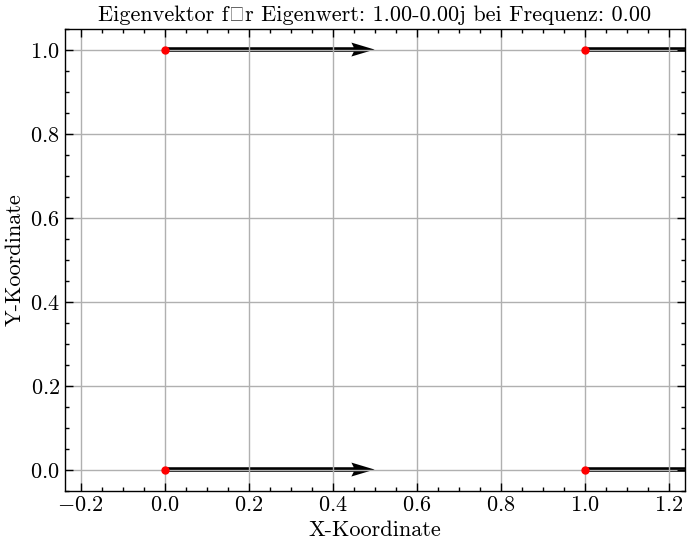

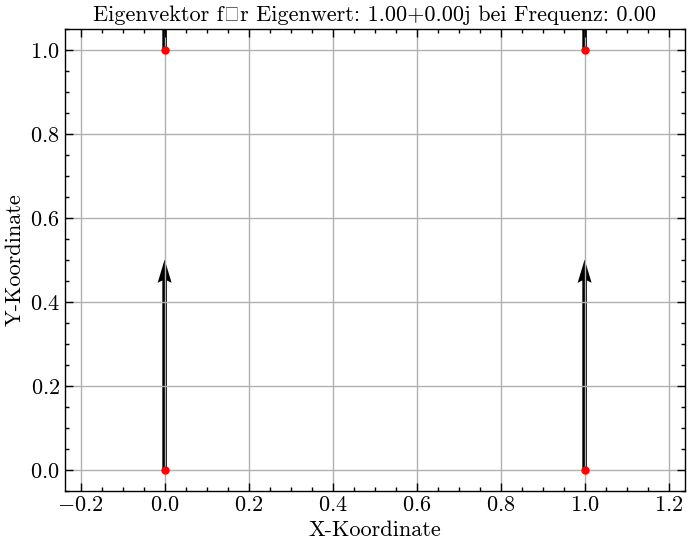

[9.99999998e-01-5.31394225e-22j 9.99999997e-01+2.14258181e-21j
 9.23537633e-17+1.08358250e-21j 1.07396090e-19+9.00218783e-23j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]


array([[ 5.00000001e-01+2.13696248e-15j, -0.00000000e+00+0.00000000e+00j,
         0.00000000e+00-0.00000000e+00j,  7.07106120e-01+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [-0.00000000e+00+0.00000000e+00j,  5.00000001e-01+0.00000000e+00j,
         7.29710630e-01+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 5.00000001e-01+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         0.00000000e+00-0.00000000e+00j,  7.07106120e-01+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [-0.00000000e+00+0.00000000e+00j,  5.00000001e-01-1.82053469e-13j,
         3.93682014e-01-2.09317716e

In [13]:
frequencies = [0]
for freq_idx, freq_val in enumerate(frequencies):

    # Find closest frequency
    freq_diff = np.abs(w - freq_val)
    matrix_idx = np.argmin(freq_diff)
    actual_freq = w[matrix_idx]
    
    eigvals = all_eigenvals[matrix_idx]
    eigvecs = all_eigenvecs[matrix_idx]
    
    #atom_positions = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]) # 2x3y
    atom_positions = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #2x2y
    #atom_positions = np.array([[0, 0], [1, 0]]) # 2x3y

    n = atom_positions.shape[0]


    non_zero_real_indices = np.where(np.real(eigvals) > 0.5)[0]
    print(non_zero_real_indices)

    for eigvec_idx in non_zero_real_indices:
        eigvec = eigvecs[:, eigvec_idx]

        # Reshape des Eigenvektors in ein 2D-Array (n x 2)
        # Die Vektoren sind (x1, y1, x2, y2, ... , xn, yn).
        # Wir formen sie in eine (n, 2) Matrix um.
        vec_reshaped = eigvec.reshape(n, 2)

        # Startkoordinaten der Pfeile
        # x-Koordinaten der Atome
        x_start = atom_positions[:, 0]
        # y-Koordinaten der Atome
        y_start = atom_positions[:, 1]

        # Richtungs- und Längenkomponenten der Pfeile (dx, dy)
        # x-Komponenten der Eigenvektoren
        dx = vec_reshaped[:, 0]
        # y-Komponenten der Eigenvektoren
        dy = vec_reshaped[:, 1]

        # Erstellen des Plots
        plt.figure()
        plt.title(f'Eigenvektor für Eigenwert: {eigvals[eigvec_idx]:.2f} bei Frequenz: {actual_freq:.2f}')
        plt.quiver(x_start, y_start, dx, dy, angles='xy', scale_units='xy', scale=1)
        
        # Optional: Skalieren der Pfeile für bessere Sichtbarkeit
        # plt.quiver(x_start, y_start, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue')
        
        # Plot der Atompositionen
        plt.plot(x_start, y_start, 'ro', markersize=5)
        plt.ylim(-0.5, 4)
        
        # Achsen-Labels und Ansicht
        plt.xlabel('X-Koordinate')
        plt.ylabel('Y-Koordinate')
        plt.grid()
        plt.axis('equal') # Stellt sicher, dass die Achsen gleich skaliert sind
        plt.show()

print(eigvals)

eigvecs